<div style="background-color: lightgray; padding: 18px;">
    <h1> Learning Python | Day 23
    
</div>

### Data Visualization with Seaborn:

- Barplot;
- Countplot;
- Boxplot;
- Histplot and KDEplot;

Next class:
- Jointplot;
- LMplot and Scatterplot;
- Heatmap;
- Pairplot;

Sources:
- https://matplotlib.org/
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/tutorial.html
- https://seaborn.pydata.org/examples/index.html
- https://python.plainenglish.io/data-visualization-with-matplotlib-and-seaborn-part-4-5-ca2a485fc4e5
- https://www.kaggle.com/datasets/ngawangchoeda/car-price-dataset

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Introduction
</div>

In the past two notebooks, we've covered the fundamental concepts of ``Matplotlib``, laying the groundwork for creating basic visualizations in python.

Now, we're ready to take our data visualization skills to the next level. In this notebook, we'll delve into the ``Seaborn`` library, which offers enhanced aesthetics and additional plotting functions. Leveraging the power of Seaborn along with datasets from Pandas, we'll explore advanced techniques to construct compelling visualizations that extract meaningful insights from our data.

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Dataset
</div>

The dataset we are going to use here is stored in ``car_price.csv``, downloaded from kaggle datasets.

This dataset is basically a list of cars including its details, such as fuel type, body type, the number of doors, fuel consumption rate, etc. We will load this dataset using ``pd.read_csv()``.

In [2]:
df_car = pd.read_csv('car_price.csv')
print(df_car.shape)
df_car.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Barplot
</div>

What we are going to do now is to count the number of cars of each body type. 

To do so, we can apply ``value_counts()`` function to ``carbody`` column.

In [4]:
df_car['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Previously, in Matplotlib we can use ``plt.bar()`` to construct a bar chart from the data in Figure 3. 

Instead of using that one, here we will employ ``sns.barplot()`` to do the similar task. 

The arguments required to be passed are similar to ``plt.bar()``, namely ``x=body.index`` and ``y=body.values``, in which ``body.index`` is basically an array of sedan, hatchback, wagon, etc, while ``body.values`` contains the number of 96, 70, 24, etc.

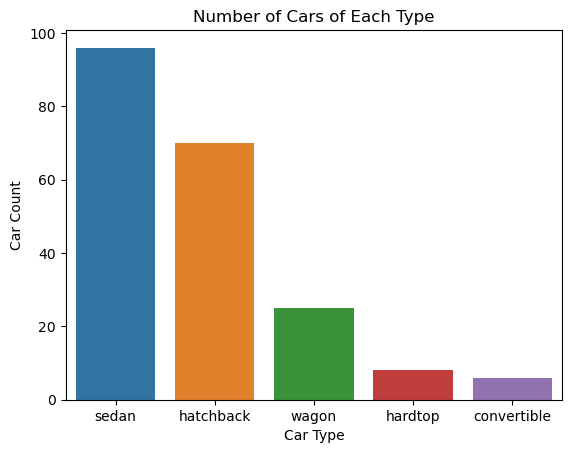

In [5]:
body = df_car['carbody'].value_counts()

sns.barplot(x=body.index, y=body.values)

plt.title('Number of Cars of Each Type')
plt.xlabel('Car Type')
plt.ylabel('Car Count')

plt.show()

If you take a closer look at the code above, you can see that we use both ``sns`` and ``plt``. 

In this case, the graph itself is created using ``sns.barplot()`` while the other attributes are modified using Matplotlib functions, i.e., ``plt.title()``, ``plt.xlabel()``, and ``plt.ylabel()``. In fact, both modules can actually work together because Seaborn is originally built on top of Matplotlib. I

n this first example, you might not see any advantage of using Seaborn just yet. But later you are going to notice that there are a lot of things we can do easily using this module.

---
Now I would like to demonstrate how to visualize the **average value** of a specific column grouped by a categorical data in the dataset. 
Well, it might sound a bit complicated at first, but you will get the point very soon. In the following code, I would like to find out the average ``engine size`` (numerical) of each ``car type`` (categorical):

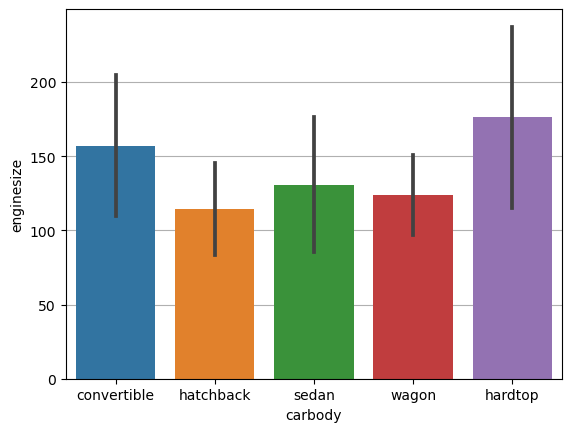

In [6]:
sns.barplot(x=df_car['carbody'], y=df_car['enginesize'], 
            errorbar='sd', zorder=2)

plt.grid(axis='y', zorder=1)
plt.show()

In the code above, we set the ``carbody`` column of ``df_car`` for the x param while the ``enginesize`` column for the y. 

Since we are working with the ``enginesize value`` (rather than the count) we can also display the so-called ``errorbar``. In this case, we want the graph to show an information regarding the data distribution as well. Hence, I set the errorbar to ``sd`` which essentially stands for **standard deviation**. Here, standard deviation is displayed in form of a black vertical line. 

In the above case, since the line belongs to hardtop cars is longer than that of wagon cars, so is the standard deviation. In other words, we can say that the enginesize distribution of hardtop is **more widespread** than wagon.

---
``Seaborn`` is also created to be compatible with ``Pandas``. 

Thanks to this feature, we can simply write the column name which the data is going to be displayed. The data frame name itself goes into the ``data`` parameter.

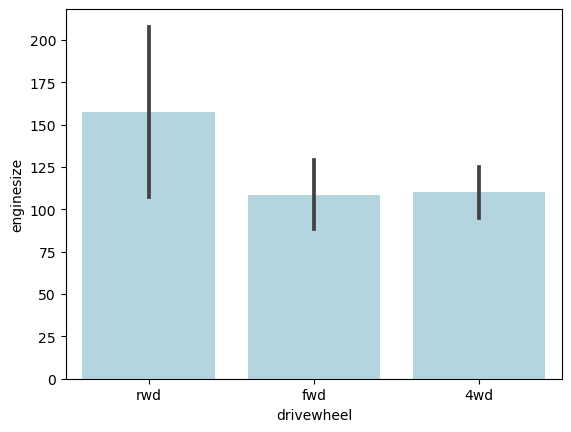

In [8]:
sns.barplot(x='drivewheel', y='enginesize', data=df_car, 
            errorbar='sd', color='lightblue')
plt.show()

**Conclusion:** *In case you’re not familiar with cars, rwd, fwd and 4wd are abbreviations for Rear-Wheel Drive, Front-Wheel Drive and Four-Wheel Drive, respectively. These terms essentially indicate which set of wheels on the car is responsible for propelling it forward.*

Based on the above barplot, we can observe that most rwd cars have bigger engine size as compared to the other drivewheel categories. This notion is proven since the average enginesize of rwd cars is the highest among the others. Furthermore, it is also seen that its distribution is the widest one among the others as well.

---
``Seaborn`` does not have a specific function for horizontal bar charts. So, if you want to make it horizontal you can just swap the value for x and y:

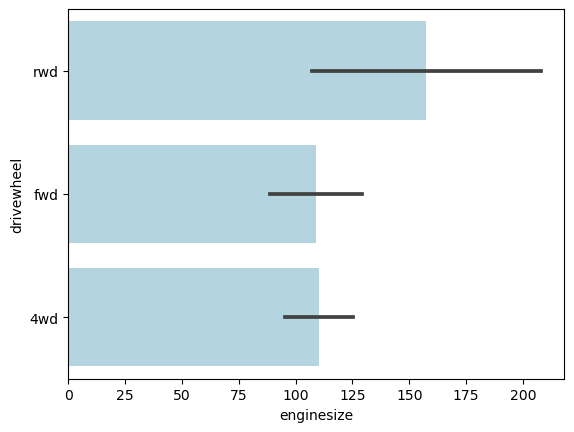

In [10]:
sns.barplot(x='enginesize', y='drivewheel', data=df_car, 
            errorbar='sd', color='lightblue')
plt.show()

---
Another example:

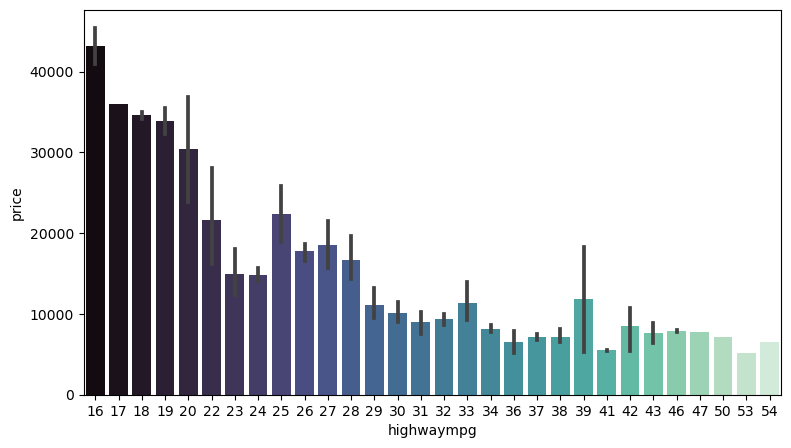

In [11]:
plt.figure(figsize=(9,5))
sns.barplot(x='highwaympg', y='price', data=df_car, palette='mako')
plt.show()

There is an interesting thing we can observe from the above figure:

The trend shows that ``price`` and ``highwaympg`` are somewhat correlated, in a sense that cheaper cars have a tendency to have higher MPG, i.e., more fuel-efficient. On the other hand, expensive car owners might be extremely rich since not only they need to purchase the car itself, but they also need to spend a lot of money for fuel. In addition to the above code, here I use a palette named ``mako`` to make the graph look more colorful. In fact, you can actually pass any Matplotlib colormaps to the param which you can see the list in the source link.

*Conclusion: ``sns.barplot()`` takes two main arguments: x and y, in which either x or y needs to be numerical and the other one can be either numerical or categorical. In a case where we use numerical data for both axes, the one put in x will be perceived as categorical.*

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Countplot
</div>

Before we get into the countplot function, let's load the **Titanic** dataset first.

This dataset basically consists of the details of Titanic passengers such as name, gender, age, and the status whether he or she survived the disaster:

In [12]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this chapter let's talk about ``sns.countplot()``, a function we can use to visualize the count of a specific category. 

Since this function is only designed for counting, hence the only main thing we need to pass for the argument is an array containing a bunch of different categories. 

The first example I want to show you is the graph visualizing the number of males and females on board:

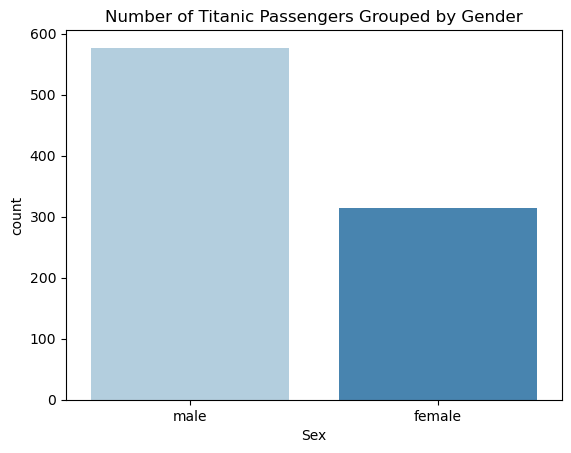

In [24]:
sns.countplot(x=df_titanic['Sex'], palette='Blues')
plt.title('Number of Titanic Passengers Grouped by Gender')
plt.show()

Converting this chart into horizontal is simple, we can just change ``x=’Sex’`` to ``y=’Sex’``:

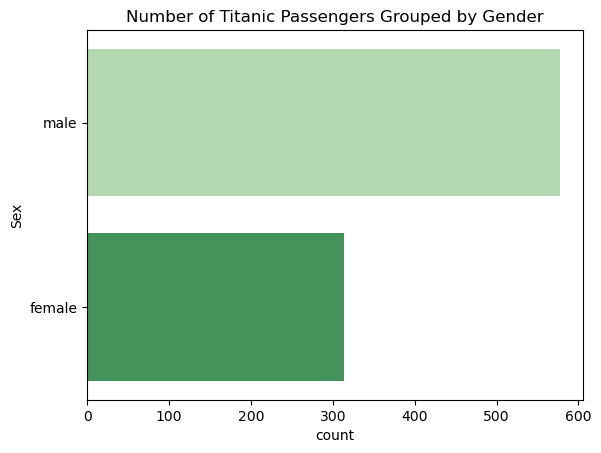

In [16]:
sns.countplot(y='Sex', data=df_titanic, palette='Greens')
plt.title('Number of Titanic Passengers Grouped by Gender')
plt.show()

**Note:** If you feel like the bars look too large, you can resize it through the ``width`` parameter. Keep in mind that the default value is **0.8**, so if you want to make it smaller, ensure you pass a lower value.

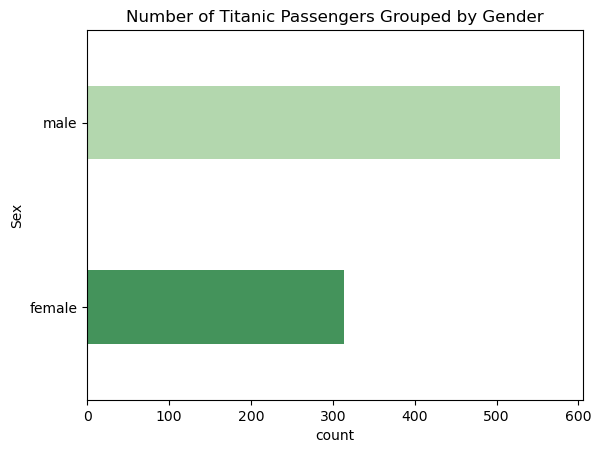

In [25]:
sns.countplot(y='Sex', data=df_titanic, palette='Greens', width=0.4)
plt.title('Number of Titanic Passengers Grouped by Gender')
plt.show()

---
Next, let's see another parameter which is going to be very useful in many cases:
- ``hue`` -> We can actually think of hue as the second variable which breaks down the first one so that we can see the more detailed data distribution.

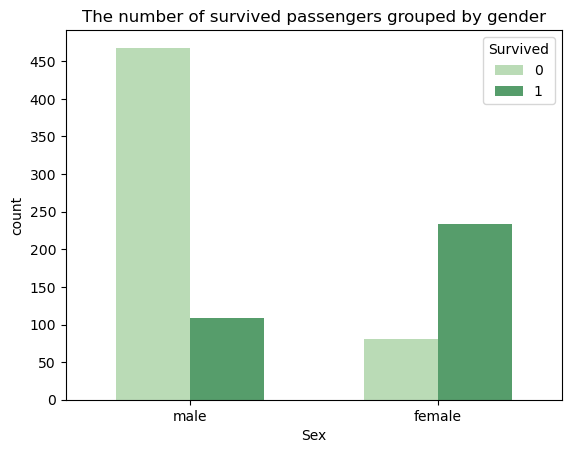

In [29]:
sns.countplot(x='Sex', hue='Survived', data=df_titanic, palette='Greens', alpha=0.9, width=0.6, zorder=2)
plt.title('The number of survived passengers grouped by gender')
plt.yticks(np.arange(0, 500, 50))
#plt.grid(axis='y', zorder=1)
plt.show()

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Boxplot
</div>

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Histplot and KDEplot
</div>

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Jointplot
</div>

<div style="background-color: lightgreen; padding: 10px;">
    <h2> LMplot and Scatterplot
</div>

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Heatmap
</div>

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Pairplot
</div>